In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as cls
import pathlib

In [2]:
save_plots = False

In [3]:
## Create plots directory, if missing
plotsDirectory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/plots/studies_on_davinci_parsed_logs/'
                  + 'protoparticle_data_distribution_study/')
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

In [4]:
convergedColor = 'tab:blue'
failedColor = 'tab:orange'

# Import MC data

In [5]:
inputFile = '~/data/parsedDaVinciLog.h5'
df_events = pd.read_hdf(inputFile, key='LHCbMC_Lb')

# Helper functions

In [6]:
## Rows and columns begin at 0
def Feature1DComponent(series, component):
    return series.map(lambda x: x[component])

In [7]:
def PlotOverlappingHistograms(
    series,
    axisLabel,
    plotTitle,
    fileName,
    binning,
    boundaries,
    scale='linear',
    scientificNotationLabel=False,
    normalized=True
):
    ## Converged
    plt.hist(series.loc[df_events['status'] == 'Converged'],
             bins=binning,
             range=boundaries,
             label="Converged",
             histtype='stepfilled',
             edgecolor=convergedColor,
             color=cls.to_rgba(convergedColor, alpha=0.05),
             density=normalized
    )
    
    ## Failed
    plt.hist(series.loc[df_events['status'] == 'NonConverged'],
             bins=binning,
             range=boundaries,
             label="Failed",
             histtype='stepfilled',
             edgecolor=failedColor,
             color=cls.to_rgba(failedColor, alpha=0.05),
             density=normalized
    )
    
   
    plt.grid()
    plt.xlabel(axisLabel)
    plt.title(plotTitle)
    plt.yscale(scale)
    
    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientificNotationLabel:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plotsDirectory + fileName + '.pdf', bbox_inches='tight')
    
    plt.show()

## Dictionaries

In [8]:
histoParams = {
    'p_refPoint_x': {
        'series': Feature1DComponent(df_events['p_refPoint'], 0),
        'boundaries': [-2000,2000],
        'axisLabel': '$x$ [mm]',
    },
    
    'p_refPoint_y': {
        'series': Feature1DComponent(df_events['p_refPoint'], 1),
        'boundaries': [-2000,2000],
        'axisLabel': '$y$ [mm]',
    },
    
    'p_refPoint_z': {
        'series': Feature1DComponent(df_events['p_refPoint'], 2),
        'boundaries': [7500,8500],
        'axisLabel': '$z$ [mm]',
    },
    
    'p_momentum_x': {
        'series': Feature1DComponent(df_events['p_momentum'], 0),
        'boundaries': [-10000,10000],
        'axisLabel': '$p_x$ [MeV/$c$]',
    },
    
    'p_momentum_y': {
        'series': Feature1DComponent(df_events['p_momentum'], 1),
        'boundaries': [-5000,5000],
        'axisLabel': '$p_y$ [MeV/$c$]',
    },
    
    'p_momentum_z': {
        'series': Feature1DComponent(df_events['p_momentum'], 2),
        'boundaries': [0,1e5],
        'axisLabel': '$p_z$ [MeV/$c$]',
    },
    
    'p_energy': {
        'series': df_events['p_energy'],
        'boundaries': [0,1e5],
        'axisLabel': '$E$ [MeV]',
    },
    
    'pim_refPoint_x': {
        'series': Feature1DComponent(df_events['pim_refPoint'], 0),
        'boundaries': [-2500,2500],
        'axisLabel': '$x$ [mm]',
    },
    
    'pim_refPoint_y': {
        'series': Feature1DComponent(df_events['pim_refPoint'], 1),
        'boundaries': [-2000,2000],
        'axisLabel': '$y$ [mm]',
    },
    
    'pim_refPoint_z': {
        'series': Feature1DComponent(df_events['pim_refPoint'], 2),
        'boundaries': [7500,8500],
        'axisLabel': '$z$ [mm]',
    },
    
    'pim_momentum_x': {
        'series': Feature1DComponent(df_events['pim_momentum'], 0),
        'boundaries': [-10000,10000],
        'axisLabel': '$p_x$ [MeV/$c$]',
    },
    
    'pim_momentum_y': {
        'series': Feature1DComponent(df_events['pim_momentum'], 1),
        'boundaries': [-2000,2000],
        'axisLabel': '$p_y$ [MeV/$c$]',
    },
    
    'pim_momentum_z': {
        'series': Feature1DComponent(df_events['pim_momentum'], 2),
        'boundaries': [0,4e4],
        'axisLabel': '$p_z$ [MeV/$c$]',
    },
    
    'pim_energy': {
        'series': df_events['pim_energy'],
        'boundaries': [0,4e4],
        'axisLabel': '$E$ [MeV]',
    },    
}

# Distribution of protoparticle properties
## Proton
### Reference points

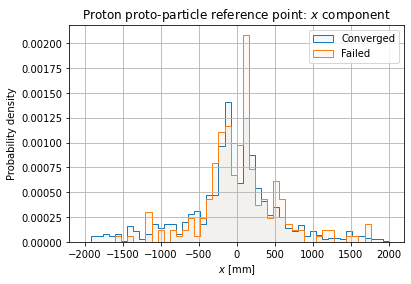

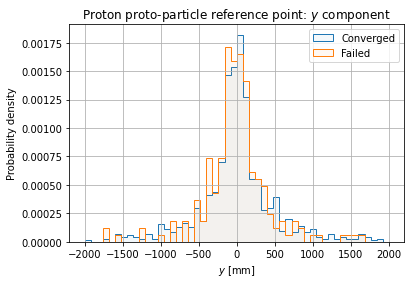

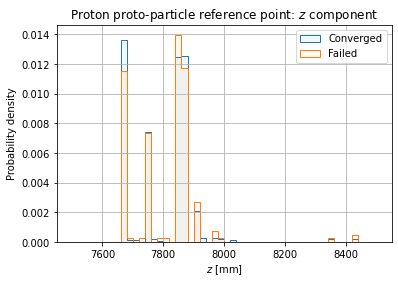

In [9]:
for feature in [key for key in histoParams.keys() if key.startswith('p_refPoint')]:
    
    plotArgs = histoParams[feature].copy()
    plotArgs['binning'] = 50
    plotArgs["normalized"] = True
    plotArgs['scale'] = 'linear'
    plotArgs['fileName'] = feature
    plotArgs['plotTitle'] = "Proton proto-particle reference point: $" + feature[-1] + "$ component"
    PlotOverlappingHistograms(**plotArgs)

### Momenta and energy

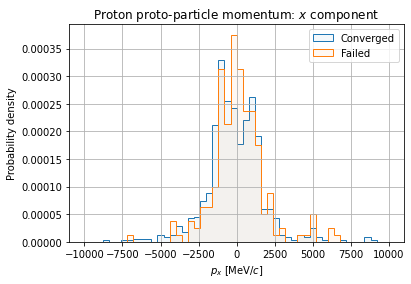

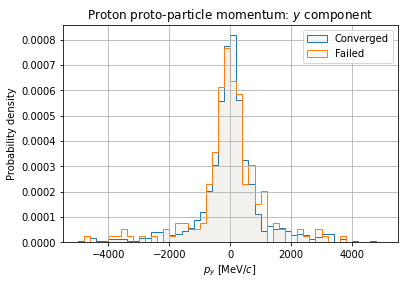

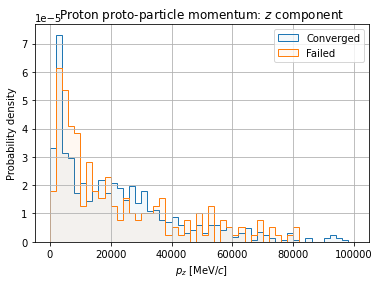

In [10]:
for feature in [key for key in histoParams.keys() if key.startswith('p_momentum')]:
    
    plotArgs = histoParams[feature].copy()
    plotArgs['binning'] = 50
    plotArgs["normalized"] = True
    plotArgs['scale'] = 'linear'
    plotArgs['fileName'] = feature
    plotArgs['plotTitle'] = "Proton proto-particle momentum: $" + feature[-1] + "$ component"
    PlotOverlappingHistograms(**plotArgs)

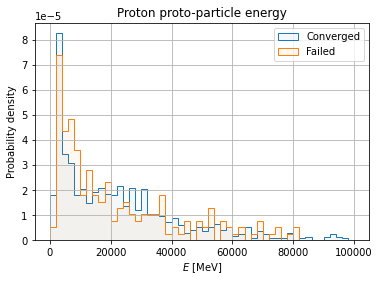

In [11]:
feature = 'p_energy'
plotArgs = histoParams[feature].copy()
plotArgs['binning'] = 50
plotArgs["normalized"] = True
plotArgs['scale'] = 'linear'
plotArgs['fileName'] = feature
plotArgs['plotTitle'] = "Proton proto-particle energy"
PlotOverlappingHistograms(**plotArgs)

## Pion
### Reference points

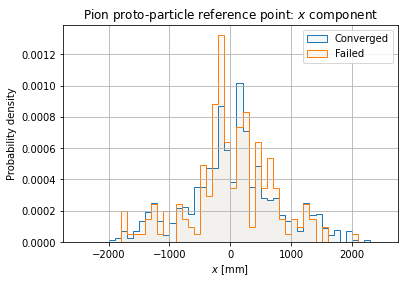

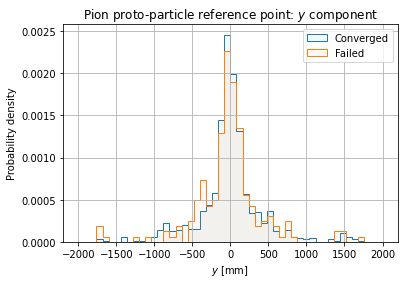

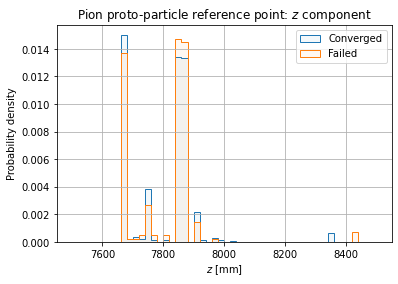

In [12]:
for feature in [key for key in histoParams.keys() if key.startswith('pim_refPoint')]:
    
    plotArgs = histoParams[feature].copy()
    plotArgs['binning'] = 50
    plotArgs["normalized"] = True
    plotArgs['scale'] = 'linear'
    plotArgs['fileName'] = feature
    plotArgs['plotTitle'] = "Pion proto-particle reference point: $" + feature[-1] + "$ component"
    PlotOverlappingHistograms(**plotArgs)

### Momenta and energy

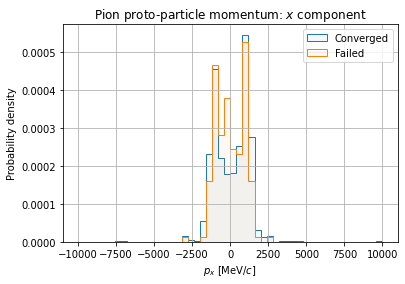

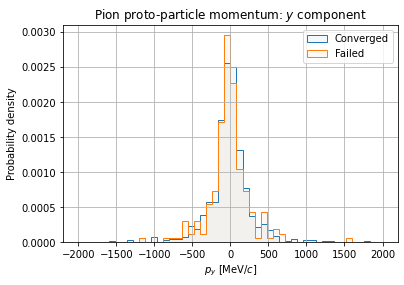

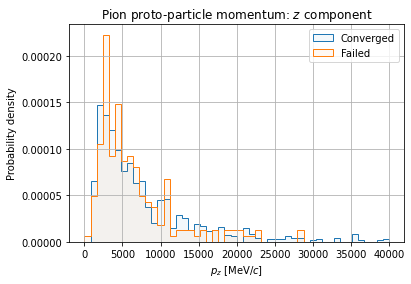

In [13]:
for feature in [key for key in histoParams.keys() if key.startswith('pim_momentum')]:
    
    plotArgs = histoParams[feature].copy()
    plotArgs['binning'] = 50
    plotArgs["normalized"] = True
    plotArgs['scale'] = 'linear'
    plotArgs['fileName'] = feature
    plotArgs['plotTitle'] = "Pion proto-particle momentum: $" + feature[-1] + "$ component"
    PlotOverlappingHistograms(**plotArgs)

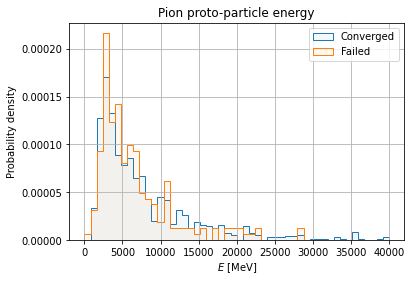

In [14]:
feature = 'pim_energy'
plotArgs = histoParams[feature].copy()
plotArgs['binning'] = 50
plotArgs["normalized"] = True
plotArgs['scale'] = 'linear'
plotArgs['fileName'] = feature
plotArgs['plotTitle'] = "Pion proto-particle energy"
PlotOverlappingHistograms(**plotArgs)